This notebook is a work in progress so there is a lot to be added later.
# Step 1: Import helpful libraries


In [3]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
from scipy import sparse
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectPercentile
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler,MaxAbsScaler,Normalizer,QuantileTransformer,PowerTransformer
from sklearn.impute import SimpleImputer
from itertools import combinations
from sklearn.cluster import KMeans 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer,ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
import matplotlib.gridspec as gridspec
#from catboost import CatBoostRegressor
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
#import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
# For training random forest model
import lightgbm as lgb
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.svm import SVR
#import smong 
from sklearn.linear_model import LinearRegression, RidgeCV
import category_encoders as ce
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')


# Step 2: Load the data

Next, we'll load the training and test data.

We set index_col=0 in the code cell below to use the id column to index the DataFrame. (If you're not sure how this works, try temporarily removing index_col=0 and see how it changes the result.)


In [4]:
# import lux
# Load the training data
train = pd.read_csv("../input/30-days-of-ml/train.csv")
test = pd.read_csv("../input/30-days-of-ml/test.csv")
# Preview the data
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,B,B,B,C,B,B,A,E,C,...,0.400361,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634
1,2,B,B,A,A,B,D,A,F,A,...,0.533087,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233
2,3,A,A,A,C,B,D,A,D,A,...,0.650609,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351
3,4,B,B,A,C,B,D,A,E,C,...,0.668980,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253
4,6,A,A,A,C,B,D,A,E,A,...,0.686964,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260


# EDA 

In [5]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250018.576947,0.527335,0.460926,0.490498,0.496689,0.491654,0.510526,0.467476,0.537119,0.498456,0.474872,0.474492,0.473216,0.494561,0.508273,8.241979
std,144450.150010,0.230599,0.214003,0.253346,0.219199,0.240074,0.228232,0.210331,0.218140,0.239920,0.218007,0.255949,0.222022,0.247292,0.222950,0.746555
min,1.000000,-0.118039,-0.069309,-0.056104,0.130676,0.255908,0.045915,-0.224689,0.203763,-0.260275,0.117896,0.048732,0.052608,-0.074208,0.151050,0.140329
25%,124772.500000,0.405965,0.310494,0.300604,0.329783,0.284188,0.354141,0.342873,0.355825,0.332486,0.306874,0.276017,0.308151,0.289074,0.300669,7.742071
50%,250002.500000,0.497053,0.427903,0.502462,0.465026,0.390470,0.488865,0.429383,0.504661,0.439151,0.434620,0.459975,0.433812,0.422887,0.472400,8.191373
75%,375226.500000,0.668060,0.615113,0.647512,0.664451,0.696599,0.669625,0.573383,0.703441,0.606056,0.614333,0.691579,0.642057,0.714502,0.758447,8.728634
max,499999.000000,1.058443,0.887253,1.034704,1.039560,1.055424,1.067649,1.111552,1.032837,1.040229,0.982922,1.055960,1.071444,0.975035,0.905992,10.411992


In [6]:
# Check the structure of the data
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

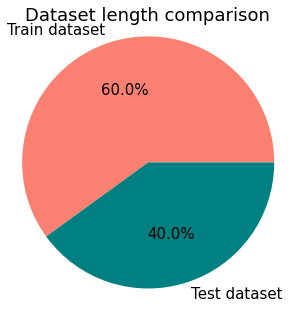

In [7]:
# Comparing the datasets length
fig, ax = plt.subplots(figsize=(5, 5))
pie = ax.pie([len(train), len(test)],
             labels=["Train dataset", "Test dataset"],
             colors=["salmon", "teal"],
             textprops={"fontsize": 15},
             autopct='%1.1f%%')
ax.axis("equal")
ax.set_title("Dataset length comparison", fontsize=18)
fig.set_facecolor('white')
plt.show();

# cat/num

In [8]:
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

# Numerical features distribution 
## Histograms of numerical features

<Figure size 432x288 with 0 Axes>

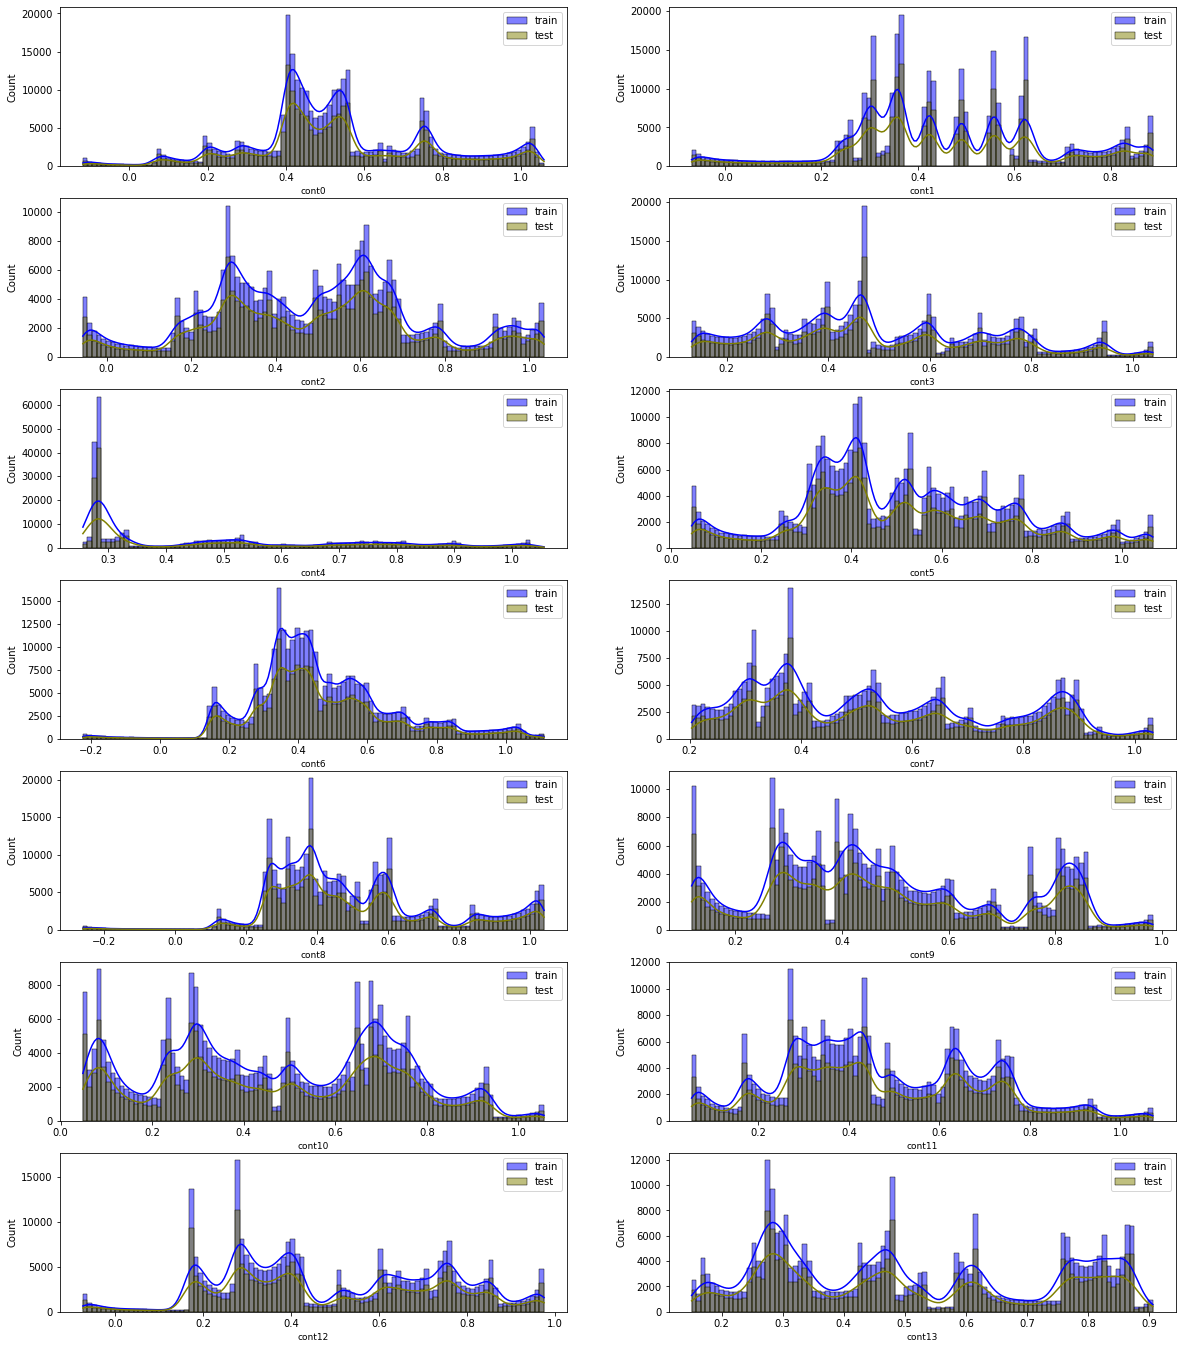

In [9]:
# Numerical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(7, 2,figsize=(20, 24))
for feature in num_columns:
    plt.subplot(7, 2,i)
    sns.histplot(train[feature],color="blue", kde=True,bins=100, label='train')
    sns.histplot(test[feature],color="olive", kde=True,bins=100, label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

**Histograms of numerical data show a desperation of values with what look like multinomial distributions, also column cont1 seems to have some areas where the distribution becomes kinda discrete and again test numerical data seems to be similar to train numerical data.**
## Zooming on the correlation between numerical variables and target.

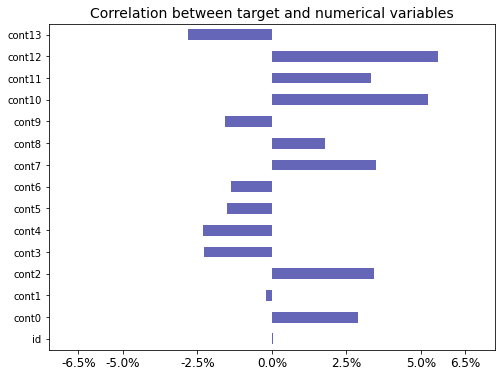

In [10]:
train.corr()['target'][:-1].plot.barh(figsize=(8,6),alpha=.6,color='darkblue')
plt.xlim(-.075,.075);
plt.xticks([-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065],
           [str(100*i)+'%' for i in [-0.065, -0.05 , -0.025,  0.   ,  0.025,  0.05 ,  0.065]],fontsize=12)
plt.title('Correlation between target and numerical variables',fontsize=14);



    It's clear tat there isn't any clear relation between numerical variables and target.

Now Exploring correlation between all numerical variables.
First we get a correlation grid of all numercial variables and target


In [11]:
train.corr().style.background_gradient(cmap='viridis')

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
id,1.000000,0.002445,0.001970,0.001552,0.000595,-0.002411,-0.001864,0.002295,-0.001246,-0.004349,-0.000328,0.000832,0.002284,-0.000480,-0.001694,0.000480
cont0,0.002445,1.000000,-0.009422,-0.296989,0.211333,-0.109776,0.392456,0.133995,0.294687,0.388510,0.394969,0.363413,0.255941,0.417872,0.023234,0.028819
cont1,0.001970,-0.009422,1.000000,-0.000627,-0.002233,-0.000285,0.003812,0.001321,0.013475,-0.021541,-0.002727,-0.001648,-0.017221,-0.006862,-0.010097,-0.002096
cont2,0.001552,-0.296989,-0.000627,1.000000,-0.180856,0.092780,-0.300140,-0.141724,-0.283989,-0.326456,-0.309118,-0.300273,-0.325023,-0.352009,-0.039815,0.034280
cont3,0.000595,0.211333,-0.002233,-0.180856,1.000000,-0.069934,0.201441,0.040133,0.172586,0.185221,0.194807,0.199525,0.140934,0.255117,0.037920,-0.022759
cont4,-0.002411,-0.109776,-0.000285,0.092780,-0.069934,1.000000,-0.148807,-0.044417,-0.095653,-0.122594,-0.123468,-0.132211,-0.115173,-0.151080,-0.012798,-0.023132
cont5,-0.001864,0.392456,0.003812,-0.300140,0.201441,-0.148807,1.000000,0.211800,0.329357,0.392057,0.411366,0.402053,0.308249,0.473964,0.053779,-0.015058
cont6,0.002295,0.133995,0.001321,-0.141724,0.040133,-0.044417,0.211800,1.000000,0.135333,0.117833,0.187303,0.178168,0.168731,0.171010,0.031183,-0.013807
cont7,-0.001246,0.294687,0.013475,-0.283989,0.172586,-0.095653,0.329357,0.135333,1.000000,0.332639,0.320239,0.283414,0.279405,0.363091,0.056958,0.035143
cont8,-0.004349,0.388510,-0.021541,-0.326456,0.185221,-0.122594,0.392057,0.117833,0.332639,1.000000,0.406517,0.341430,0.297121,0.434196,0.050163,0.017740



## Box plot of numerical columns

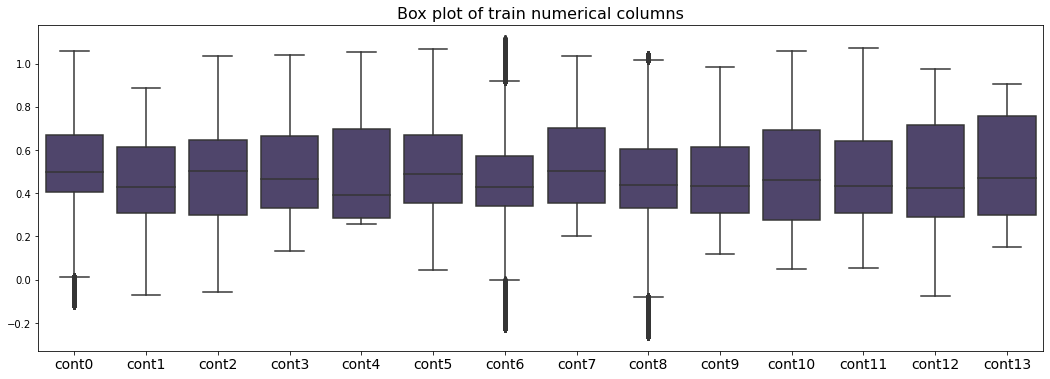

In [12]:
v0 = sns.color_palette(palette='viridis').as_hex()[0]
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=train[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of train numerical columns', fontsize=16);


## test 

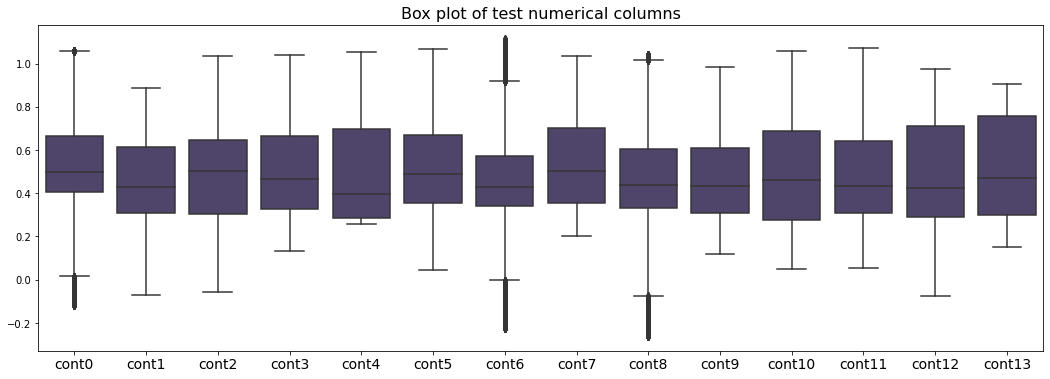

In [13]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=test[num_columns], color=v0,saturation=.5);
plt.xticks(fontsize= 14)
plt.title('Box plot of test numerical columns', fontsize=16);

**Numerical Data seems to be kinda normalized with few outliers appearing in the box plot Also test numerical data seems to looks like the train ones.**

# Number of categorical unique values

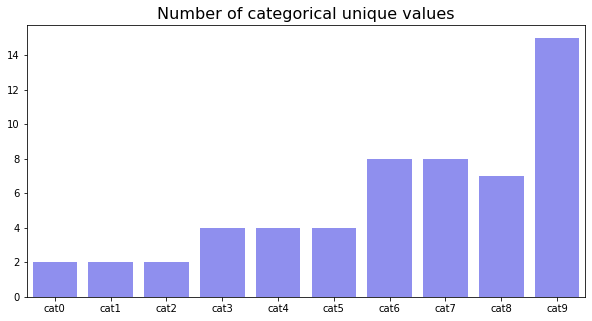

In [14]:
fig = plt.figure(figsize=(10,5))
sns.barplot(y=train[cat_columns].nunique().values, x=train[cat_columns].nunique().index, color='blue', alpha=.5)
plt.xticks(rotation=0)
plt.title('Number of categorical unique values',fontsize=16);

Most of columns seems to have few categorical unique values except cat9 column.

# Categorical features distribution 

<Figure size 432x288 with 0 Axes>

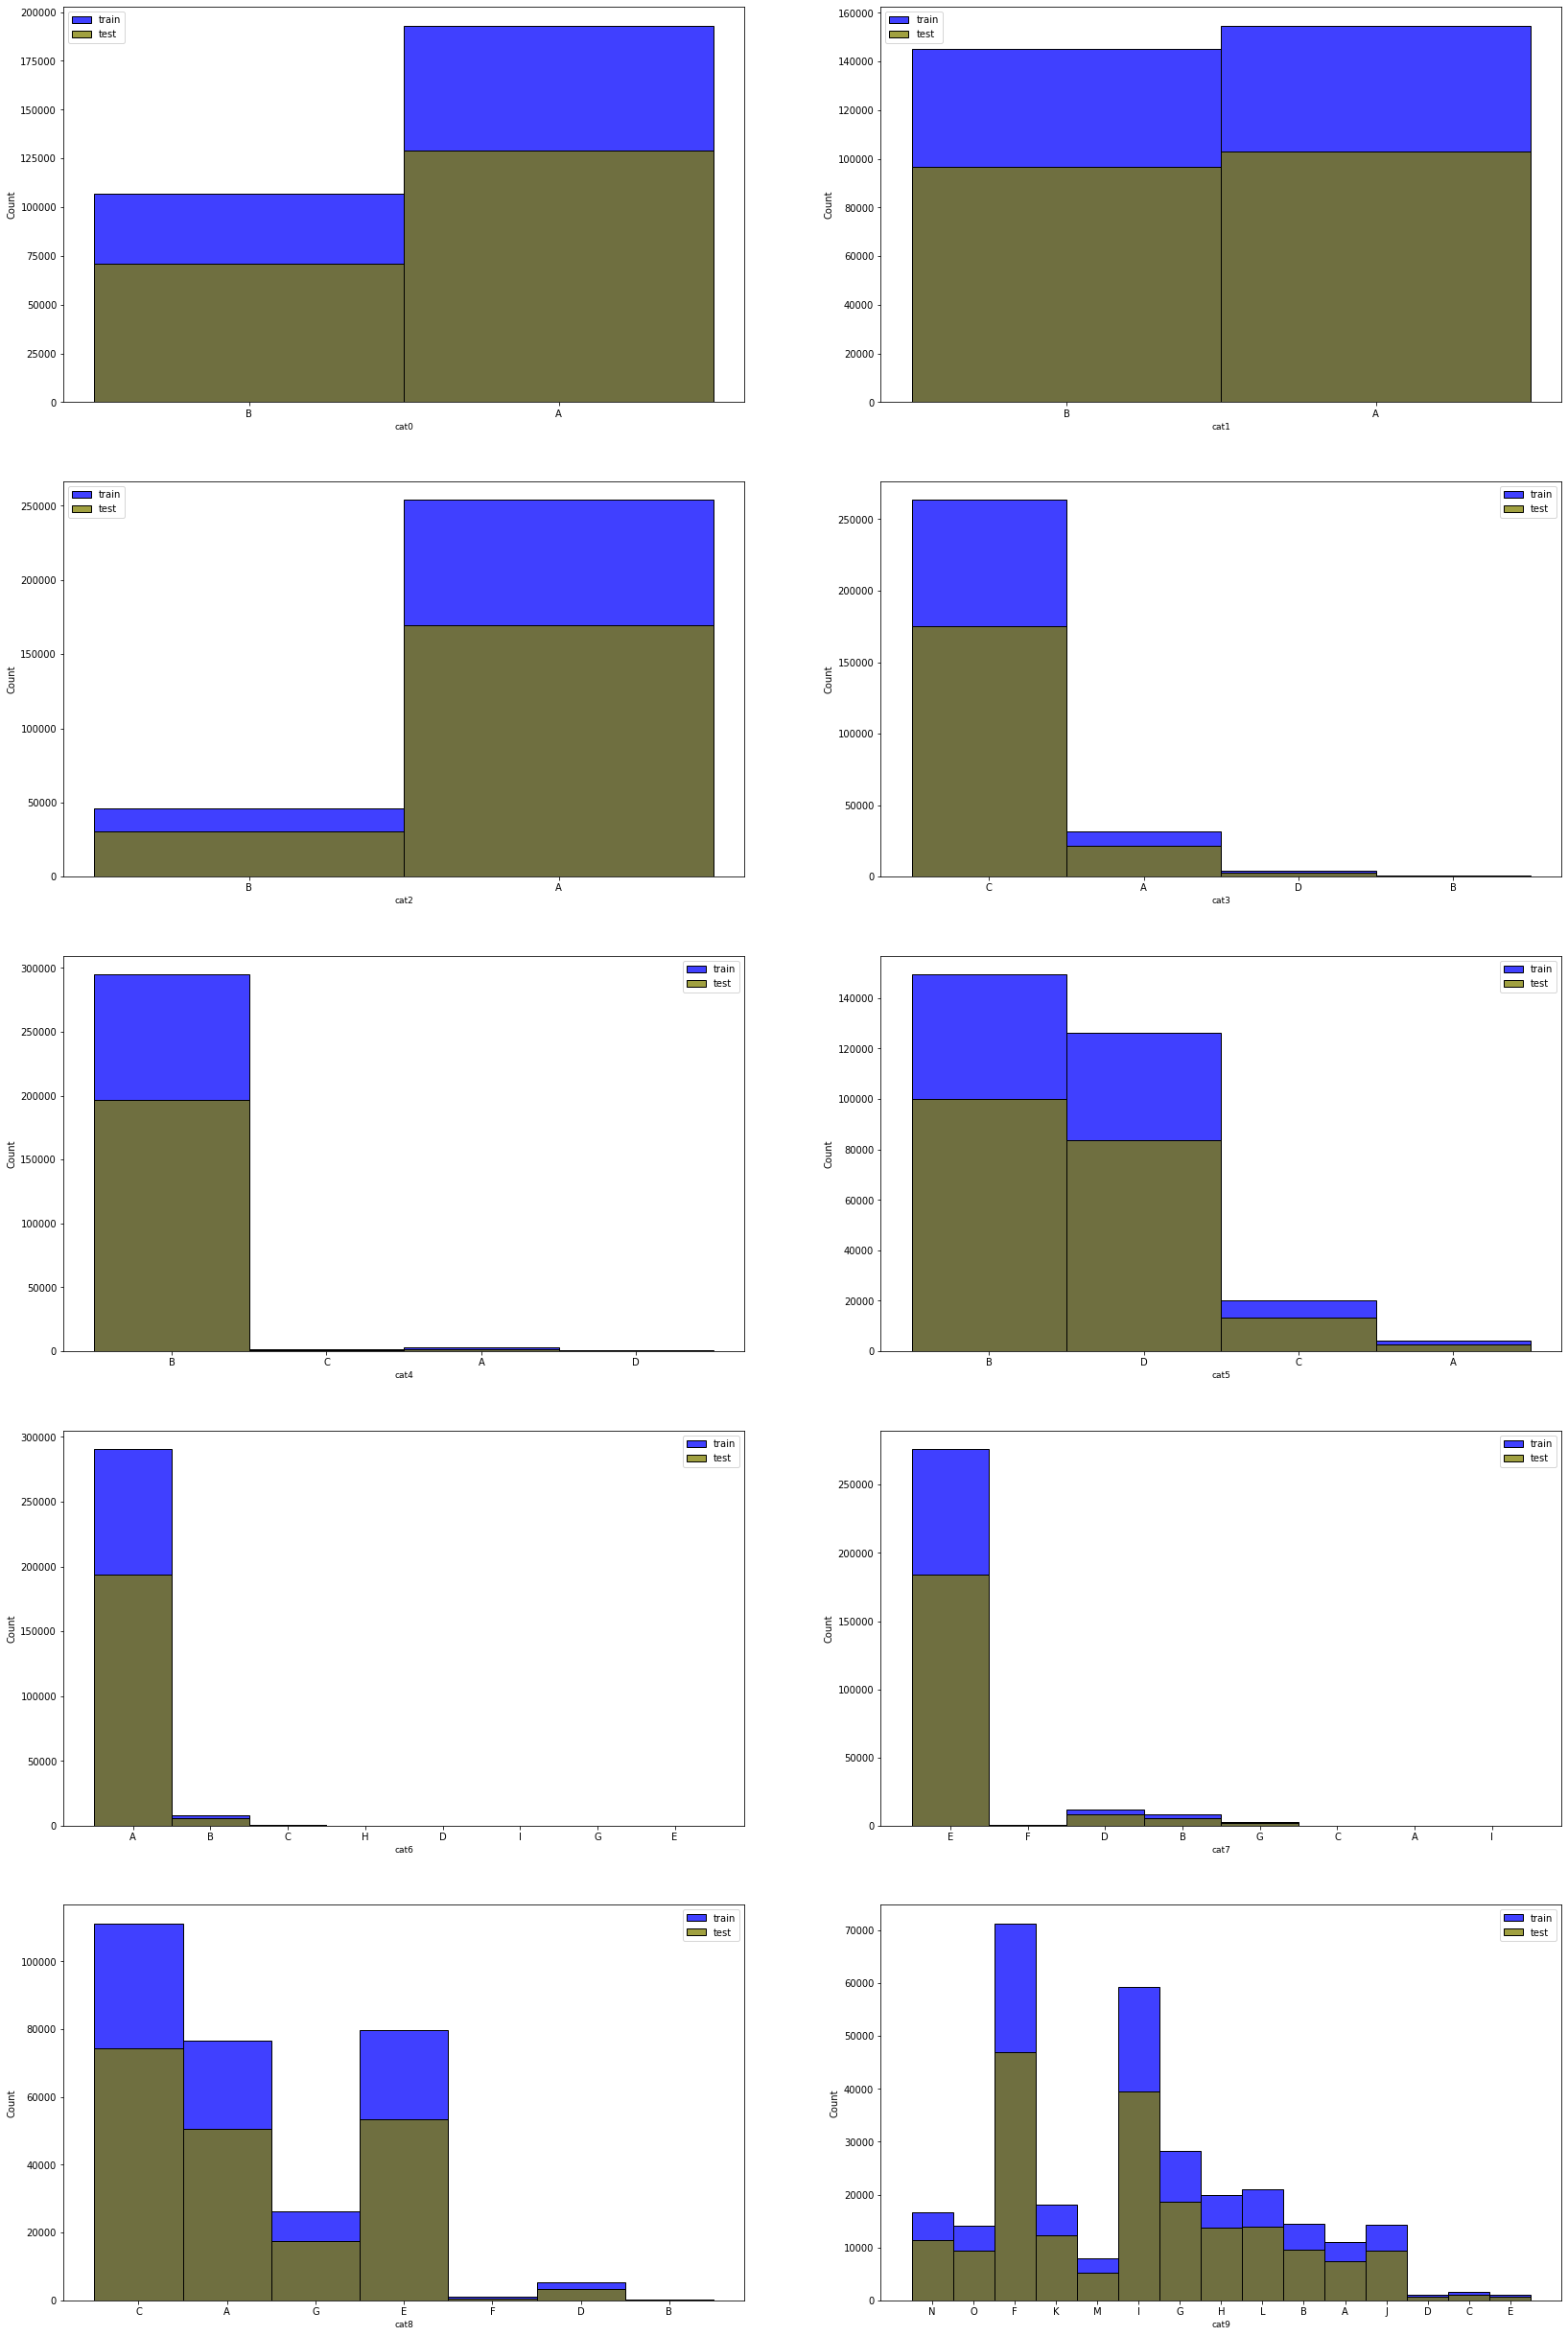

In [15]:
# Categorical features distribution 
i = 1
plt.figure()
fig, ax = plt.subplots(5, 2,figsize=(28, 44))
for feature in cat_columns:
    plt.subplot(5, 2,i)
    sns.histplot(train[feature],color="blue", label='train')
    sns.histplot(test[feature],color="olive", label='test')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

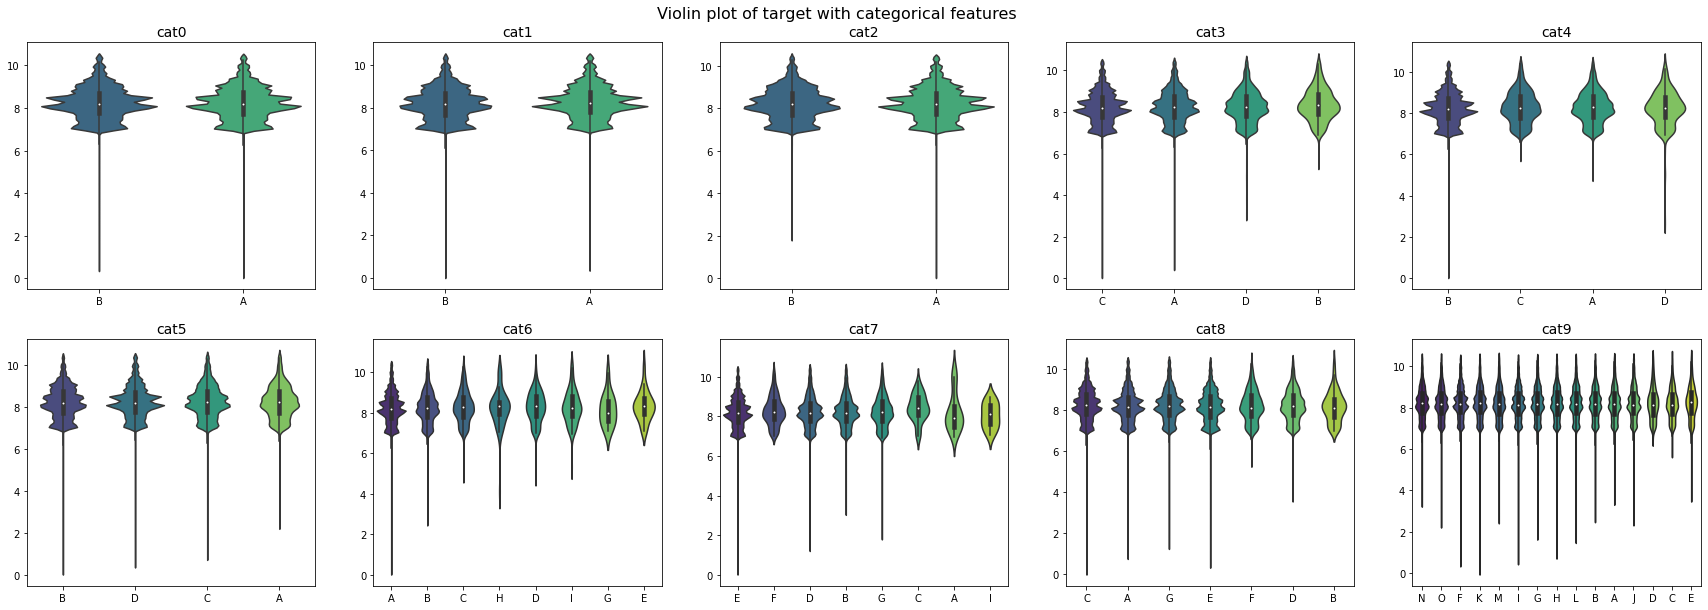

In [16]:
fig = plt.figure(figsize=(30,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.violinplot(data = train, y = 'target', x = 'cat'+str(n),ax=ax, alpha =.7, fill=True,palette='viridis')
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('Violin plot of target with categorical features', fontsize=16,y=.93);


# KDE plot of target with categorical features

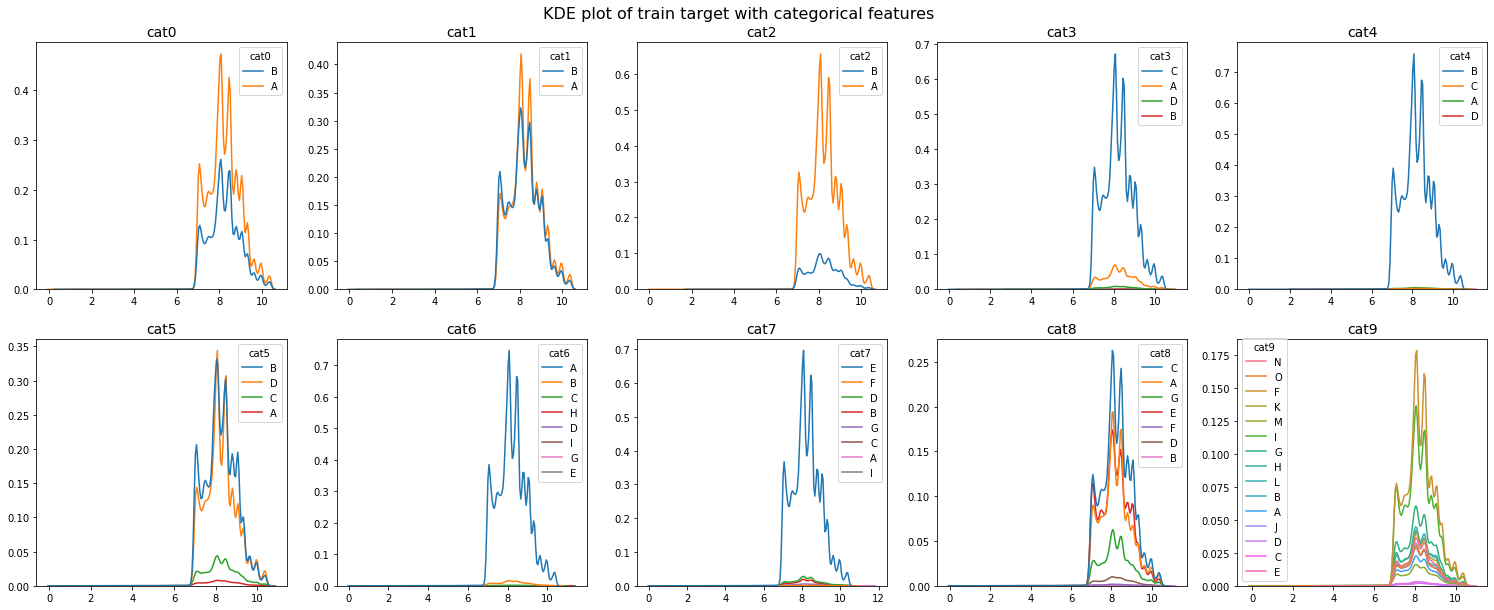

In [17]:
fig = plt.figure(figsize=(26,10))
grid =  gridspec.GridSpec(2,5,figure=fig,hspace=.2,wspace=.2)
n =0
for i in range(2):
    for j in range(5):
        ax = fig.add_subplot(grid[i, j])
        sns.kdeplot(data = train, x = 'target', hue = 'cat'+str(n),ax=ax, alpha =.7, fill=False)
        ax.set_title('cat'+str(n),fontsize=14)
        ax.set_xlabel('')
        ax.set_ylabel('')
        n += 1
fig.suptitle('KDE plot of train target with categorical features', fontsize=16,y=.93);

**This plot kinda agrees with previous one but it looks like the KDE of some categorical values are pretty much flat compared to other value.**

# Convert Dtypes : 

In [18]:
train[train.select_dtypes(['float64']).columns] = train[train.select_dtypes(['float64']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object']).columns] = train.select_dtypes(['object']).apply(lambda x: x.astype('category'))

# Target 
##  exploring target data main statistics

In [19]:
train['target'].describe()

count    300000.000000
mean          8.241979
std           0.746555
min           0.140329
25%           7.742071
50%           8.191373
75%           8.728634
max          10.411992
Name: target, dtype: float64

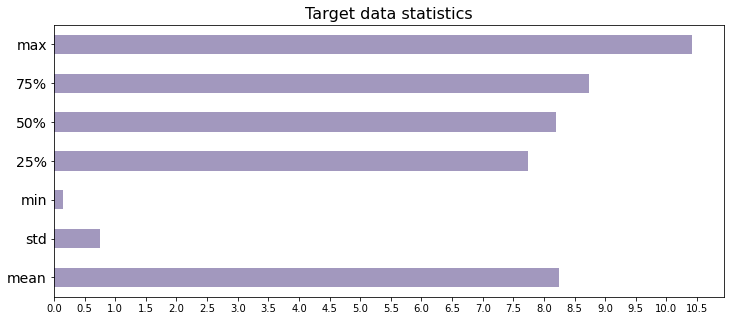

In [20]:
train['target'].describe().iloc[1:].plot.barh(color=v0,alpha=.5,figsize=(12,5))
plt.title('Target data statistics',fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(np.arange(0,10.8,.5));

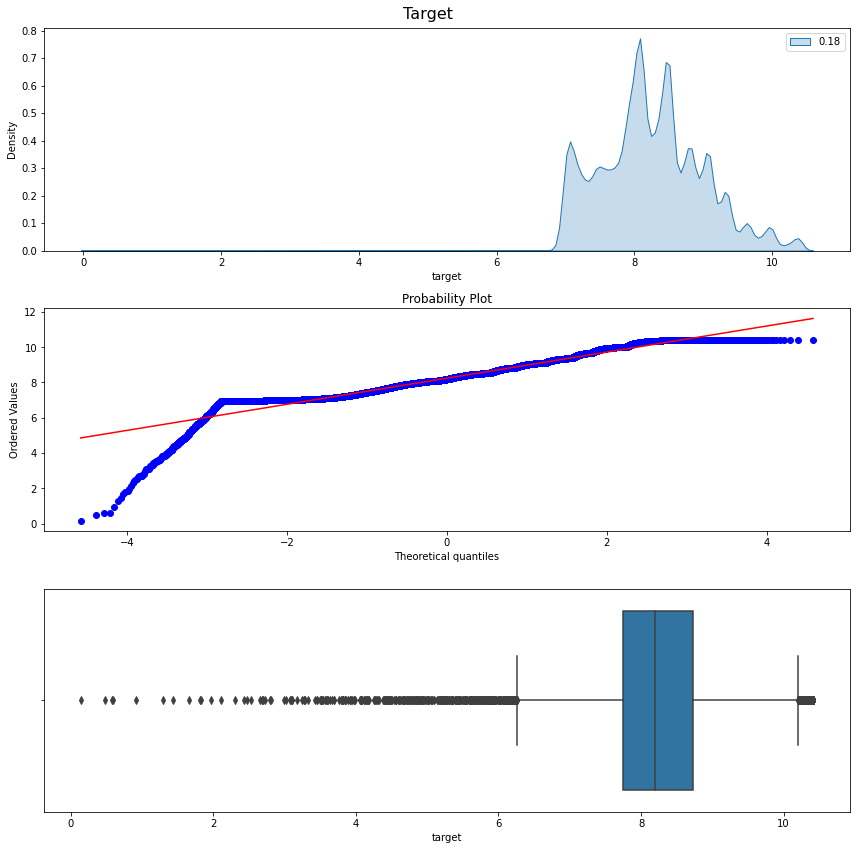

In [21]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
f, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))
f.suptitle('Target', fontsize=16)
g = sns.kdeplot(train['target'], shade=True, label="%.2f"%(train['target'].skew()), ax=axes[0])
g = g.legend(loc="best")
stats.probplot(train['target'], plot=axes[1])
sns.boxplot(x='target', data=train, orient='h', ax=axes[2]);
plt.tight_layout()
plt.show()

##  Box plot of target data with percentile of .1% and 99.9%

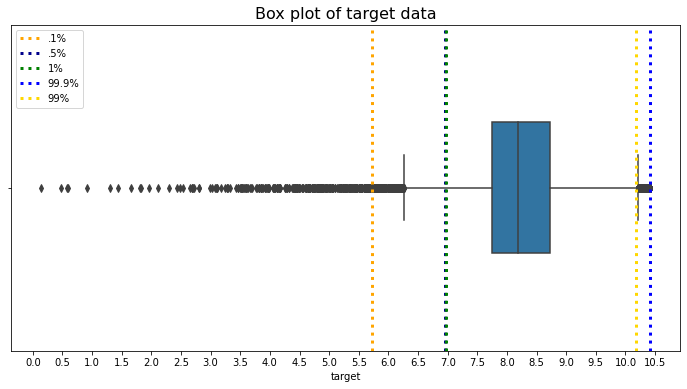

In [22]:
y=train['target']
plt.figure(figsize=(12,6))
sns.boxplot(x=y, width=.4);
plt.axvline(np.percentile(y,.1), label='.1%', c='orange', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,.5), label='.5%', c='darkblue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,1), label='1%', c='green', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99.9), label='99.9%', c='blue', linestyle=':', linewidth=3)
plt.axvline(np.percentile(y,99), label='99%', c='gold', linestyle=':', linewidth=3)
plt.legend()
plt.title('Box plot of target data', fontsize=16)
plt.xticks(np.arange(0,10.8,.5));

**Seems like outliers need to be handled**
##  Feature Engineering/Dimenssion Reduction 



Feature engineering is the creation of new features based on existing features, and it adds information to your dataset that is useful in some way: it adds features useful for your prediction or clustering task, or it sheds insight into relationships between features. Real world data is often not neat and tidy, and in addition to preprocessing steps like standardization, you'll likely have to extract and expand information that exists in the columns in your dataset. Feature engineering is a subject that could definitely be given its own entire course, so we're just going to go over some basics


In [28]:
numdata=train[num_columns].copy()
clus = KMeans(n_clusters=5, max_iter=2000)
kmean_no_pca= clus.fit_predict(numdata)
train1=train.copy()
train1['cluster'] = kmean_no_pca
train1['cluster'] = train1['cluster'].astype('object')

<AxesSubplot:xlabel='count', ylabel='cluster'>

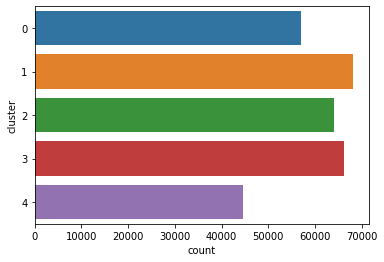

In [39]:
sns.countplot(y=train1['cluster'], data=train1)

In [30]:
train1.head(3)

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,cluster
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,4
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,1
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,3


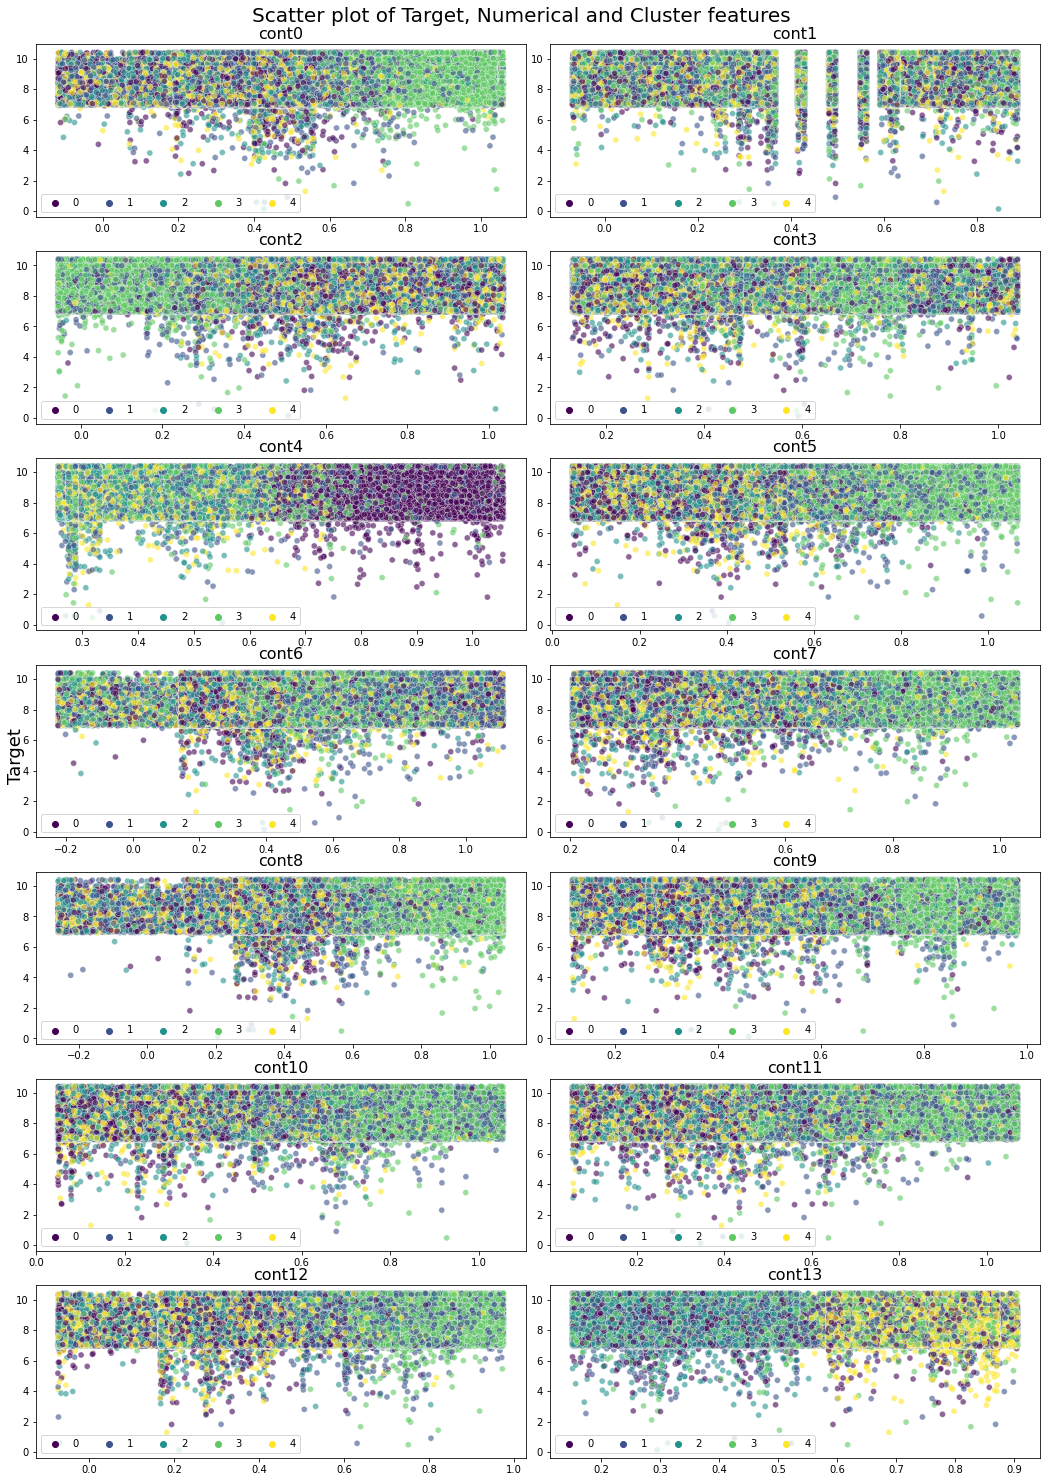

In [33]:
fig = plt.figure(figsize=(18,26))#,constrained_layout=True)
grid =  gridspec.GridSpec(7, 2, figure= fig, hspace= .2, wspace= .05)
n =0
for i in range(7):
    for j in range(2):
        ax = fig.add_subplot(grid[i, j])
        sns.scatterplot(data=train1, y='target', x='cont'+str(n), hue= 'cluster', ax=ax, palette='viridis', alpha=.6 )
        ax.set_title('cont{}'.format(str(n)),fontsize=16)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.legend(loc='lower left',ncol=20)
        n += 1
        
fig.suptitle('Scatter plot of Target, Numerical and Cluster features', fontsize=20,y=.90)
fig.text(0.11,0.5, "Target", ha="center", va="center", rotation=90, fontsize=18);

**Clustering seems like it wont add anything**

##  Crosstab

In [43]:
import seaborn as sns 
red = sns.light_palette("red", as_cmap=True)
cross_tab=pd.crosstab(train1['cat7'], train1['cluster'], margins = True)
H=cross_tab/cross_tab.loc["All"] # Divide by column totals
H.style.background_gradient(cmap=red)

cluster,0,1,2,3,4,All
cat7,,,,,,
A,0.000053,0.000176,0.000016,0.000212,0.000022,0.000103
B,0.005709,0.034477,0.006462,0.073420,0.007880,0.027657
C,0.000035,0.000117,0.000140,0.000197,0.000090,0.000120
D,0.007676,0.045970,0.006962,0.115908,0.010343,0.040480
E,0.979625,0.903223,0.980052,0.791947,0.973920,0.920133
F,0.000667,0.002990,0.000656,0.003494,0.001052,0.001873
G,0.006200,0.012914,0.005682,0.014747,0.006649,0.009567
I,0.000035,0.000132,0.000031,0.000076,0.000045,0.000067
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


***some categories are related to cluster *

In [24]:
**ùùù

SyntaxError: invalid syntax (<ipython-input-24-fcfda60861ac>, line 1)

# Define the model features and target
## Extract X and y 

In [ ]:
# Create arrays for the features and the response variable
y = train['target'].to_numpy()
X = train.drop(['id','target'], axis=1)

# Create test and train groups

Now we’ve got our dataframe ready we can split it up into the train and test datasets for our model to use. We’ll use the Scikit-Learn train_test_split() function for this. By passing in the X dataframe of raw features, the y series containing the target, and the size of the test group (i.e. 0.1 for 10%), we get back the X_train, X_test, y_train and y_test data to use in the model.

In [ ]:
# Split the dataset and labels into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)
print("{} rows in test set vs. {} in training set. {} Features.".format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

# What should we do for each colmun
## Separate features by dtype

Next we’ll separate the features in the dataframe by their datatype. There are a few different ways to achieve this. I’ve used the select_dtypes() function to obtain specific data types by passing in np.number to obtain the numeric data and exclude=['np.number'] to return the categorical data. Appending .columns to the end returns an Index list containing the column names. For the categorical features, we don’t want to include the target income column, so I’ve dropped that.
## Cat Features 

In [ ]:
# select non-numeric columns
cat_columns = train.drop(['id','target'], axis=1).select_dtypes(exclude=['int64','float64']).columns


## Num Features 

In [ ]:
# select the float columns
num_columns = train.drop(['id','target'], axis=1).select_dtypes(include=['int64','float64']).columns

In [ ]:
print(cat_columns)
print(num_columns)

# check that we have all column

In [ ]:
num_columns=['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7',
       'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']
cat_columns=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9']
all_columns = (num_columns+cat_columns)
print(all_columns)

In [ ]:
if set(all_columns) == set(train.drop(['id','target'], axis=1).columns):
    print('Ok')
else:
    # Let's see the difference 
    print('dans all_columns mais pas dans train  :', set(all_columns) - set(train.drop(['id','target'], axis=1).columns))
    print('dans X.columns   mais pas dans all_columns :', set(train.drop(['id','target'], axis=1).columns) - set(all_columns))

# Steps for K-fold cross-validation

    Split the dataset into K equal partitions (or "folds")
        So if k = 5 and dataset has 150 observations
        Each of the 5 folds would have 30 observations
    Use fold 1 as the testing set and the union of the other folds as the training set
        Testing set = 30 observations (fold 1)
        Training set = 120 observations (folds 2-5)
    Calculate testing accuracy
    Repeat steps 2 and 3 K times, using a different fold as the testing set each time
        We will repeat the process 5 times
        2nd iteration
            fold 2 would be the testing set
            union of fold 1, 3, 4, and 5 would be the training set
        3rd iteration
            fold 3 would be the testing set
            union of fold 1, 2, 4, and 5 would be the training set
        And so on...
    Use the average testing accuracy as the estimate of out-of-sample accuracy

Diagram of 5-fold cross-validation

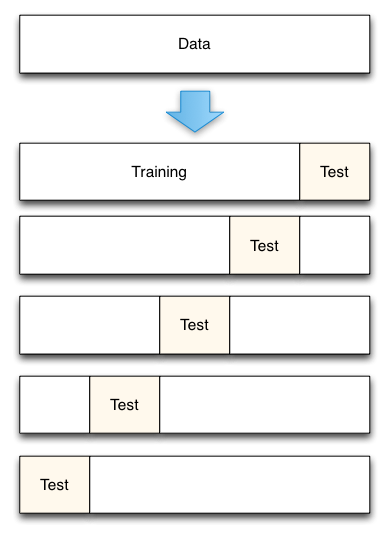






# Comparing cross-validation to train/test split

Advantages of cross-validation:

    More accurate estimate of out-of-sample accuracy
    More "efficient" use of data
        This is because every observation is used for both training and testing

Advantages of train/test split:

    Runs K times faster than K-fold cross-validation
        This is because K-fold cross-validation repeats the train/test split K-times
    Simpler to examine the detailed results of the testing process

# Cross-validation recommendations

    K can be any number, but K=10 is generally recommended
        This has been shown experimentally to produce the best out-of-sample estimate
    For classification problems, stratified sampling is recommended for creating the folds
        Each response class should be represented with equal proportions in each of the K folds
            If dataset has 2 response classes
                Spam/Ham
                20% observation = ham
                Each cross-validation fold should consist of exactly 20% ham
        scikit-learn's cross_val_score function does this by default

# Feature engineering and selection within cross-validation iterations

    Normally, feature engineering and selection occurs before cross-validation
    Instead, perform all feature engineering and selection within each cross-validation iteration
    More reliable estimate of out-of-sample performance since it better mimics the application of the model to out-of-sample data
      



In [ ]:
cross_validation_design = KFold(n_splits=3,
                                shuffle=True,
                                random_state=77)

cross_validation_design

# Select best preprocess 

In [ ]:
# Random HyperParameters
xgb_params = {'n_estimators': 7000,
            'learning_rate': 0.16,
            'subsample': 0.96,
            'colsample_bytree': 0.12,
            'max_depth': 2,
            'booster': 'gbtree', 
            'reg_lambda': 100.1,
            'reg_alpha': 15.9,
            'random_state':40}
XGBR = XGBRegressor(**xgb_params,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    #tree_method='gpu_hist',
                    #gpu_id=0, 
                    #predictor="gpu_predictor"
                   )

# Different Encoders 
encoders = {
    #'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    #'BaseNEncoder': ce.basen.BaseNEncoder,
    #'BinaryEncoder': ce.binary.BinaryEncoder,
    #'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    #'HashingEncoder': ce.hashing.HashingEncoder,
    #'HelmertEncoder': ce.helmert.HelmertEncoder,
    #'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    #'OneHotEncoder': ce.one_hot.OneHotEncoder,
    #'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    #'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    #'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    #'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    #'SumEncoder': ce.sum_coding.SumEncoder,
    'TargetEncoder': ce.target_encoder.TargetEncoder}
# Differents Scaler
Scalers={'StandardScaler':StandardScaler,
    #'RobustScaler': RobustScaler,
    #'MinMaxScaler': MinMaxScaler,
    #'PowerTransformer': PowerTransformer,
    #'QuantileTransformer': QuantileTransformer,
    #'Normalizer': Normalizer,
    #'MaxAbsScaler': MaxAbsScaler
}
# SelectBest features 
BestfeaturesPercentile={#'50features': 50,
                        #'75features': 75,
                       '100features': 100}
X1=X[0:10].copy()
y1=y[0:10].copy()
df_resultsXGBRegressor = pd.DataFrame(columns=['encoder', 'scaler', 'Percentnumoffeatures', 'rmse'])
for num in BestfeaturesPercentile:
    for scaler in Scalers:
        for key in encoders:
            try :

                categorical_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                        ('encoder', encoders[key]()),#(Numerical Input, Categorical Output)
                         ('reducedim',  SelectPercentile(f_classif,  percentile=BestfeaturesPercentile[num]))
                        
                    ]
                )    

                numeric_transformer = Pipeline(
                    steps=[
                        ('imputer', SimpleImputer(strategy='mean')),
                        ('scaler', Scalers[scaler]()),#(Numerical Input, Numerical Output)
                        ('reducedim',  SelectPercentile(f_regression, percentile=BestfeaturesPercentile[num]))

                    ]
                )

                preprocessor = ColumnTransformer(
                    transformers=[
                        ('numerical', numeric_transformer, num_columns),
                        ('categorical', categorical_transformer, cat_columns)
                    ]
                )

                pipe_XGBRegressor = Pipeline(
                    steps=[
                        ('preprocessor', preprocessor),
                        ('classifier', XGBR)
                    ]
                )
                #rmse =cross_val_score(pipe_XGBRegressor, X, y, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
                pipe_XGBRegressor.fit(X_train[0:10], y_train[0:10])
                y_pred = pipe_XGBRegressor.predict(X1)
                rmse=mean_squared_error(y1, y_pred,squared=False)
                row = {
                    'encoder': key,
                    'scaler': scaler,
                    'Percentnumoffeatures': num,
                    'rmse': rmse
                }
                df_resultsXGBRegressor = df_resultsXGBRegressor.append(row, ignore_index=True)
                df_resultsXGBRegressor.to_csv('firstmodelXGBRegressorfinal.csv',index=False)               
                print(row)
            except :
                row={
                    'encoder': key,
                    'scaler': scaler,
                    'Percentnumoffeatures': num,
                    'rmse': np.nan
                }
                df_resultsXGBRegressor = df_resultsXGBRegressor.append(row, ignore_index=True)

In [ ]:
# Random HyperParameters
xgb_params = {'n_estimators': 7000,
            'learning_rate': 0.16,
            'subsample': 0.96,
            'colsample_bytree': 0.12,
            'max_depth': 2,
            'booster': 'gbtree', 
            'reg_lambda': 100.1,
            'reg_alpha': 15.9,
            'random_state':40}
XGBR = XGBRegressor(**xgb_params,
                    objective='reg:squarederror', 
                    #early_stopping_rounds=100 ,
                    #tree_method='gpu_hist',
                    #gpu_id=0, 
                    #predictor="gpu_predictor"
                   )

# Different Encoders 
encoders = {
    #'BackwardDifferenceEncoder': ce.backward_difference.BackwardDifferenceEncoder,
    #'BaseNEncoder': ce.basen.BaseNEncoder,
    #'BinaryEncoder': ce.binary.BinaryEncoder,
    'CatBoostEncoder': ce.cat_boost.CatBoostEncoder,
    #'HashingEncoder': ce.hashing.HashingEncoder,
    #'HelmertEncoder': ce.helmert.HelmertEncoder,
    #'JamesSteinEncoder': ce.james_stein.JamesSteinEncoder,
    'OneHotEncoder': ce.one_hot.OneHotEncoder,
    #'LeaveOneOutEncoder': ce.leave_one_out.LeaveOneOutEncoder,
    #'MEstimateEncoder': ce.m_estimate.MEstimateEncoder,
    'OrdinalEncoder': ce.ordinal.OrdinalEncoder,
    #'PolynomialEncoder': ce.polynomial.PolynomialEncoder,
    #'SumEncoder': ce.sum_coding.SumEncoder,
    #'TargetEncoder': ce.target_encoder.TargetEncoder
}
# Differents Scaler
Scalers={'StandardScaler':StandardScaler,
    'RobustScaler': RobustScaler,
    #'MinMaxScaler': MinMaxScaler,
    'PowerTransformer': PowerTransformer,
    'QuantileTransformer': QuantileTransformer,
    #'Normalizer': Normalizer,
    #'MaxAbsScaler': MaxAbsScaler
}
# SelectBest features 
BestfeaturesPercentile={#'50features': 50,
                        #'75features': 75,
                       '100features': 100}
X1=X[0:100].copy()
y1=y[0:100].copy()
df_resultsXGBRegressor = pd.DataFrame(columns=['encoder', 'scaler', 'rmse'])

for scaler in Scalers:
    for key in encoders:
        try :
            categorical_transformer = Pipeline(
                steps=[
                    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                    ('encoder', encoders[key]())#(Numerical Input, Categorical Output)

                ]
            )    

            numeric_transformer = Pipeline(
                steps=[
                    ('imputer', SimpleImputer(strategy='mean')),
                    ('scaler', Scalers[scaler]())#(Numerical Input, Numerical Output)


                ]
            )
            preprocessor = ColumnTransformer(
                transformers=[
                    ('numerical', numeric_transformer, num_columns),
                    ('categorical', categorical_transformer, cat_columns)
                ]
            )

            pipe_XGBRegressor = Pipeline(
                steps=[
                    ('preprocessor', preprocessor),
                    ('classifier', XGBR)
                ]
            )
            rmse =cross_val_score(pipe_XGBRegressor, X1, y1, cv=cross_validation_design,scoring='neg_root_mean_squared_error').mean()
            #pipe_XGBRegressor.fit(X_train, y_train)
            #y_pred = pipe_XGBRegressor.predict(X_test)
            #rmse=mean_squared_error(y_test, y_pred,squared=False)
            row = {
                'encoder': key,
                'scaler': scaler,
                'Percentnumoffeatures': num,
                'rmse': -rmse
            }
            df_resultsXGBRegressor = df_resultsXGBRegressor.append(row, ignore_index=True)
            df_resultsXGBRegressor.to_csv('Finalscores.csv',index=False)               
            print(row)
        except :
            row={
                'encoder': key,
                'scaler': scaler,
                'Percentnumoffeatures': num,
                'rmse': np.nan
            }
            df_resultsXGBRegressor = df_resultsXGBRegressor.append(row, ignore_index=True)

    {'encoder': 'CatBoostEncoder', 'scaler': 'StandardScaler', 'Percentnumoffeatures': '100features', 'rmse': 0.718357676906724}
    {'encoder': 'OneHotEncoder', 'scaler': 'StandardScaler', 'Percentnumoffeatures': '100features', 'rmse': 0.7180971509832258}
    {'encoder': 'OrdinalEncoder', 'scaler': 'StandardScaler', 'Percentnumoffeatures': '100features', 'rmse': 0.7179396865955302}
    {'encoder': 'CatBoostEncoder', 'scaler': 'RobustScaler', 'Percentnumoffeatures': '100features', 'rmse': 0.7182402947710594}
    {'encoder': 'OneHotEncoder', 'scaler': 'RobustScaler', 'Percentnumoffeatures': '100features', 'rmse': 0.7180849621701831}
    {'encoder': 'OrdinalEncoder', 'scaler': 'RobustScaler', 'Percentnumoffeatures': '100features', 'rmse': 0.717930483563638}
    {'encoder': 'CatBoostEncoder', 'scaler': 'PowerTransformer', 'Percentnumoffeatures': '100features', 'rmse': 0.7184814788049801}
    {'encoder': 'OneHotEncoder', 'scaler': 'PowerTransformer', 'Percentnumoffeatures': '100features', 'rmse': 0.7180980003976504}
    {'encoder': 'OrdinalEncoder', 'scaler': 'PowerTransformer', 'Percentnumoffeatures': '100features', 'rmse': 0.7179823275353501}
    {'encoder': 'CatBoostEncoder', 'scaler': 'QuantileTransformer', 'Percentnumoffeatures': '100features', 'rmse': 0.7185965744183692}
    {'encoder': 'OneHotEncoder', 'scaler': 'QuantileTransformer', 'Percentnumoffeatures': '100features', 'rmse': 0.7181190629219993}
    {'encoder': 'OrdinalEncoder', 'scaler': 'QuantileTransformer', 'Percentnumoffeatures': '100features', 'rmse': 0.71799040024686}


In [ ]:
df_resultsXGBRegressor.sort_values(by='rmse').head(50)

# Save results as CSV 

In [ ]:
from IPython.display import HTML
import pandas as pd
import numpy as np
df_resultsXGBRegressor.to_csv('Finalscores.csv')

def create_download_link(title = "Download CSV file", filename = "Finalscores.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)
# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='Finalscores.csv')

# Conculsion:
Select the best best preprocess pipe help us improve the qualityof data before chosing the best models and tuning hyperparam
Upvote if you findu seful : 


EDA: 
https://www.kaggle.com/muhammadmelsherbini/30d-of-ml-extensive-eda

Chose best Encoder references

https://www.kaggle.com/discdiver/category-encoders-examples

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://pythonrepo.com/repo/scikit-learn-contrib-category_encoders-python-sklearn-utilities

http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/artificiel_category_2.html

https://www.kaggle.com/subinium/11-categorical-encoders-and-benchmark

https://practicaldatascience.co.uk/machine-learning/how-to-use-category-encoders-to-transform-categorical-variables

https://www.kaggle.com/discdiver/category-encoders-examples

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://pythonrepo.com/repo/scikit-learn-contrib-category_encoders-python-sklearn-utilities


http://www.xavierdupre.fr/app/papierstat/helpsphinx/notebooks/artificiel_category_2.html

https://www.kaggle.com/subinium/11-categorical-encoders-and-benchmark

https://practicaldatascience.co.uk/machine-learning/how-to-use-category-encoders-to-transform-categorical-variables

https://www.kaggle.com/discdiver/category-encoders-examples

https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

https://pythonrepo.com/repo/scikit-learn-contrib-category_encoders-python-sklearn-utilities

reference for this notebook :
Preprocess num data :

-https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

-https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html
